In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("advertising_w9.csv")

In [5]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.shape

(200, 5)

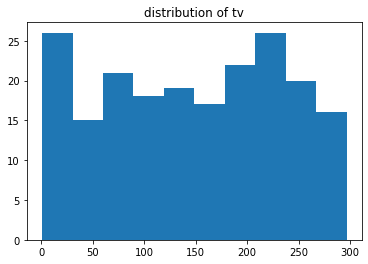

In [9]:
plt.hist(data['TV'])
plt.title("distribution of tv")
plt.show()

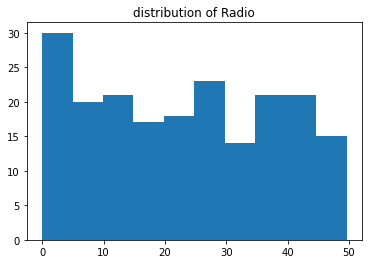

In [10]:
plt.hist(data['Radio'])
plt.title("distribution of Radio")
plt.show()

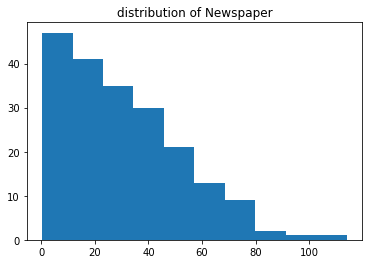

In [11]:
plt.hist(data['Newspaper'])
plt.title("distribution of Newspaper")
plt.show()

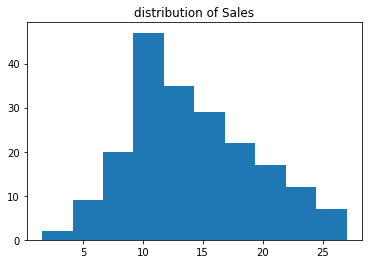

In [12]:
plt.hist(data['Sales'])
plt.title("distribution of Sales")
plt.show()

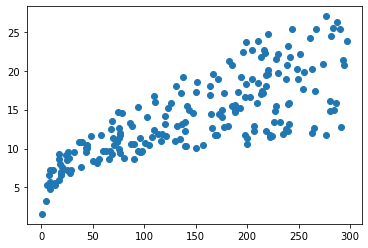

In [13]:
plt.scatter(data['TV'],data['Sales'])

In [19]:
data2 = data.drop('Unnamed: 0',axis=1)

In [20]:
data2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [21]:
data2.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [44]:
X=data[['TV','Radio','Newspaper']]
y=data['Sales']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred=lr_model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
mean_squared_error(y_test,y_pred)

3.1379480090683516

In [43]:
r2_score(y_test,y_pred)

0.9005833101920356

In [50]:
mean_squared_error(y_test,y_pred)

3.1740973539761015

In [51]:
r2_score(y_test,y_pred) #if r2 value is high , the model is good


0.8994380241009121

crossvalidation

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
lin_reg= LinearRegression()

In [59]:
cross_val_score(lin_reg,X,y,cv=5) #cv is number of folds to do the iterating process and find the mean squared error. 
# An iterable that generates (train, test) splits as arrays of indices.

array([0.87865198, 0.91763212, 0.92933032, 0.81443904, 0.89547829])

In [61]:
cv_scores= -1*cross_val_score(lin_reg,X,y,cv=5,scoring='neg_mean_squared_error')

In [62]:
cv_scores.mean()

3.0729465971002115